Dataset URL - https://www.kaggle.com/the-guardian/olympic-games









![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1200px-Olympic_rings_without_rims.svg.png)
# Dataset Understanding

Which Olympic athletes have the most gold medals? Which countries are they from and how has it changed over time?

More than 35,000 medals have been awarded at the Olympics since 1896. The first two Olympiads awarded silver medals and an olive wreath for the winner, and the IOC retrospectively awarded gold, silver, and bronze to athletes based on their rankings. This dataset includes a row for every Olympic athlete that has won a medal since the first games.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Importing Data

In [2]:
# Our multiple Datasets
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
track = pd.read_csv("data.csv")
countries = pd.read_csv("dictionary.csv")

In [3]:
summer.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


In [4]:
winter.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze


In [5]:
track.head(2)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m


In [6]:
# Converting Athlete Names
summer['Athlete']=summer['Athlete'].str.split(', ').str[::-1].str.join(' ').str.title()
summer.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver


In [7]:
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(' ').str.title()
winter.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze


In [8]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


# Summer Olympics 

In [9]:
summer=summer.merge(countries,left_on='Country',right_on='Code',how='left')
summer=summer[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
summer.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']

In [10]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [76]:
male_most_medals = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0]
male_medals = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].values[0]
female_most_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0]
female_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0]

# print('The Most Decorated Male Athlete is',male_most_medals,'with',male_medals,'medals')
# print('The Most Decorated Female Athlete is',female_most_medals,'with',female_medals,'medals')

### The Most Decorated Male Athlete is Michael Phelps with 22 medals
![](https://www.teahub.io/photos/full/327-3276728_swimmer-michael-phelps.jpg)

### The Most Decorated Female Athlete is Larisa Latynina with 18 medals
![](https://imgresizer.eurosport.com/unsafe/1200x0/filters:format(jpeg):focal(1357x605:1359x603)/origin-imgresizer.eurosport.com/2019/10/23/2701610-55854510-2560-1440.jpg)

Breakdown by Medal

In [77]:
medals = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals.head()

,Athlete,Medal,Sport
17344,Michael Phelps,Gold,18
3517,Carl Lewis,Gold,9
16581,Mark Spitz,Gold,9
19224,Paavo Nurmi,Gold,9
14731,Larisa Latynina,Gold,9


In [78]:
medals = medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns = [['Athlete','Medal','Count']]
medals.head()

,Athlete,Medal,Count
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


In [22]:
medals_country = summer.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country = medals_country.pivot('Country','Medal','Gender').fillna(0)
medals_country

Medal,Bronze,Gold,Silver
Country,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,2.0
Argentina,91.0,69.0,99.0
Armenia,8.0,1.0,2.0
Australia,472.0,312.0,405.0
...,...,...,...
Venezuela,8.0,2.0,2.0
Vietnam,0.0,0.0,2.0
Virgin Islands*,0.0,0.0,1.0


In [24]:
top = medals_country.sort_values(by='Gold',ascending=False)[:11]
top

Medal,Bronze,Gold,Silver
Country,,,
United States,1098.0,2235.0,1252.0
United Kingdom,553.0,546.0,621.0
Italy,404.0,476.0,416.0
Germany,475.0,452.0,378.0
Hungary,351.0,412.0,316.0
France,497.0,408.0,491.0
Sweden,328.0,349.0,367.0
Australia,472.0,312.0,405.0
China,221.0,290.0,296.0


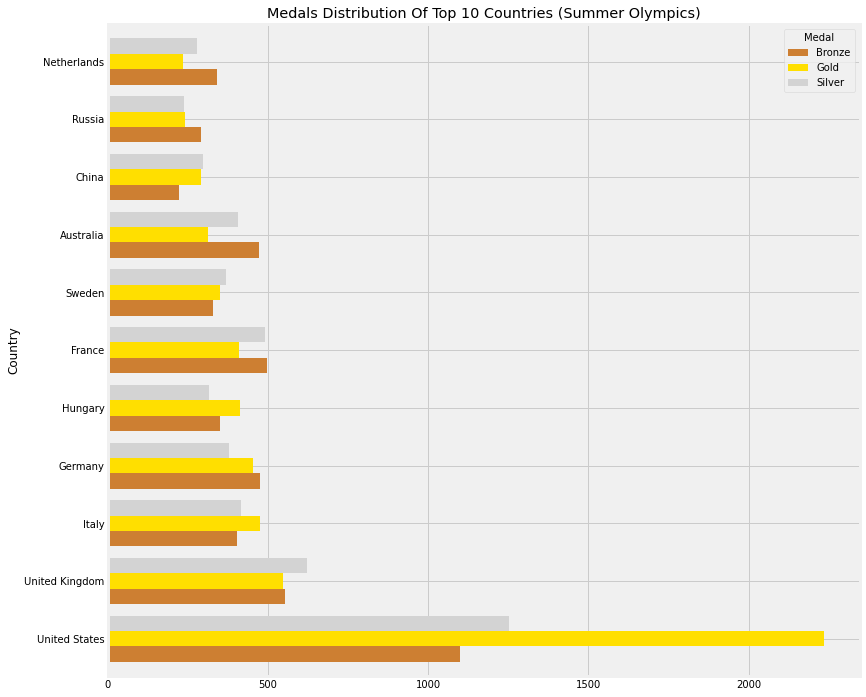

In [28]:
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

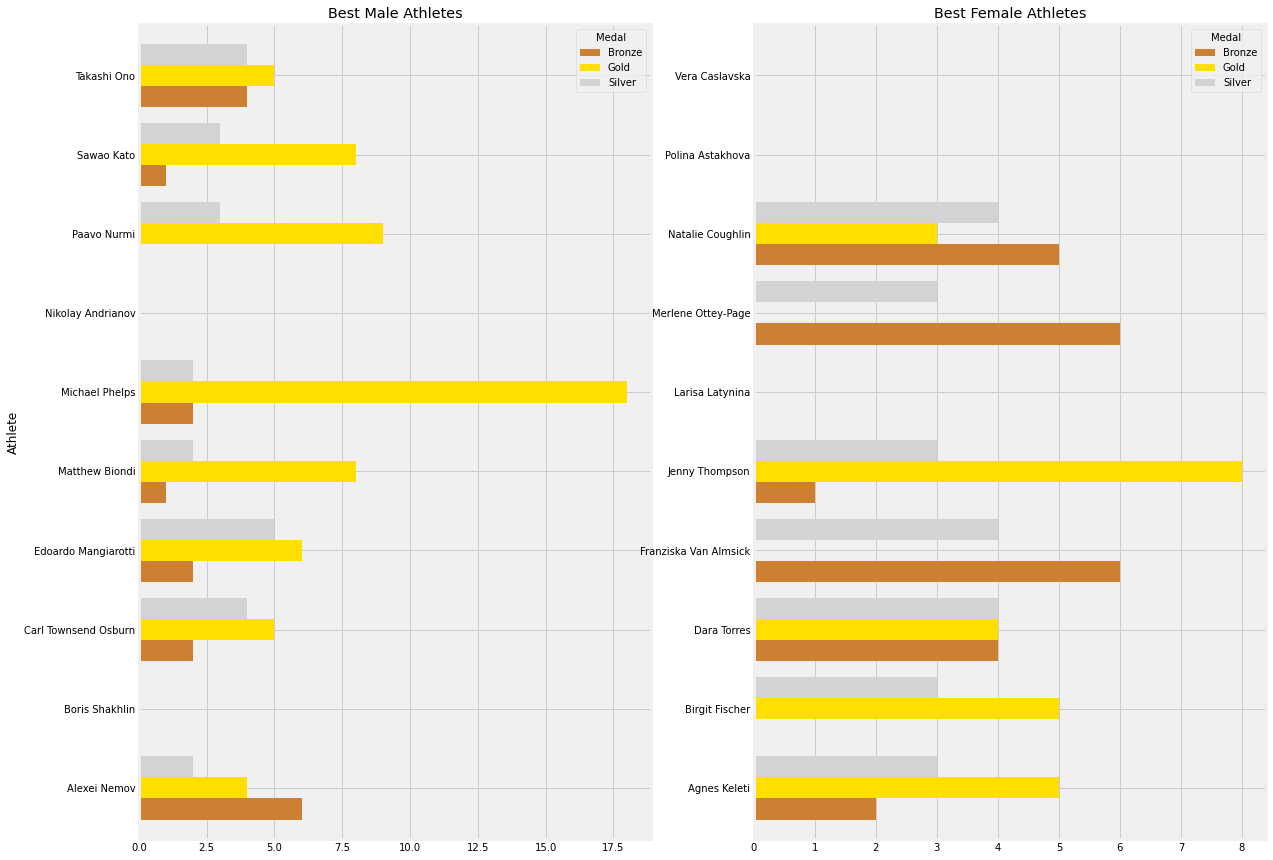

In [29]:
fig,ax=plt.subplots(1,2,figsize=(18,15))
men=summer[summer['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
men=men[men['Athlete'].isin(summer['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Country')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=summer[summer['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
women=women[women['Athlete'].isin(summer['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Country')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

In [30]:
summer['Discipline'].unique()

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Polo',
       'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing',
       'Lacrosse', 'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX', 'Marathon swimming', 'Synchronized Swimming',
       'Water Polo', 'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX',
       'Gymnastics Artistic', 'Gymnastics Rhythmi

In [36]:
summer.loc[summer['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
summer.loc[summer['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'

test=summer[summer['Country'].isin(summer['Country'].value_counts()[:10].index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
6,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,1200M Freestyle,Gold,Hungary
11,1896,Athens,Athletics,Athletics,Francis Lane,USA,Men,100M,Bronze,United States
12,1896,Athens,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100M,Bronze,Hungary
13,1896,Athens,Athletics,Athletics,Thomas Burke,USA,Men,100M,Gold,United States


In [37]:
test=test[test['Discipline'].isin(summer['Discipline'].value_counts()[:10].index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
6,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,1200M Freestyle,Gold,Hungary
11,1896,Athens,Athletics,Athletics,Francis Lane,USA,Men,100M,Bronze,United States
12,1896,Athens,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100M,Bronze,Hungary
13,1896,Athens,Athletics,Athletics,Thomas Burke,USA,Men,100M,Gold,United States


In [38]:
test=test.groupby(['Country','Discipline'])['Sport'].count().reset_index()
test.head()

,Country,Discipline,Sport
0,Australia,Athletics,84
1,Australia,Hockey,189
2,Australia,Rowing,135
3,Australia,Sailing,46
4,Australia,Shooting,10


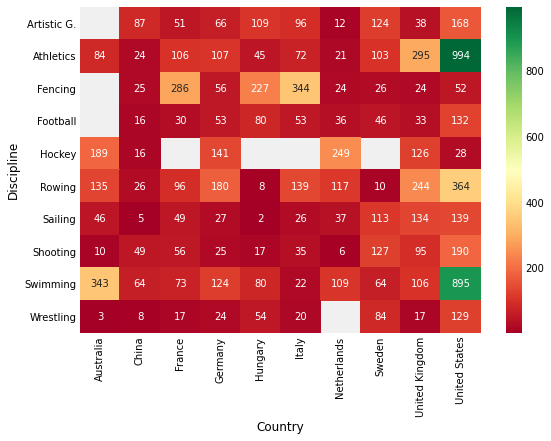

In [39]:
test=test.pivot('Discipline','Country','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

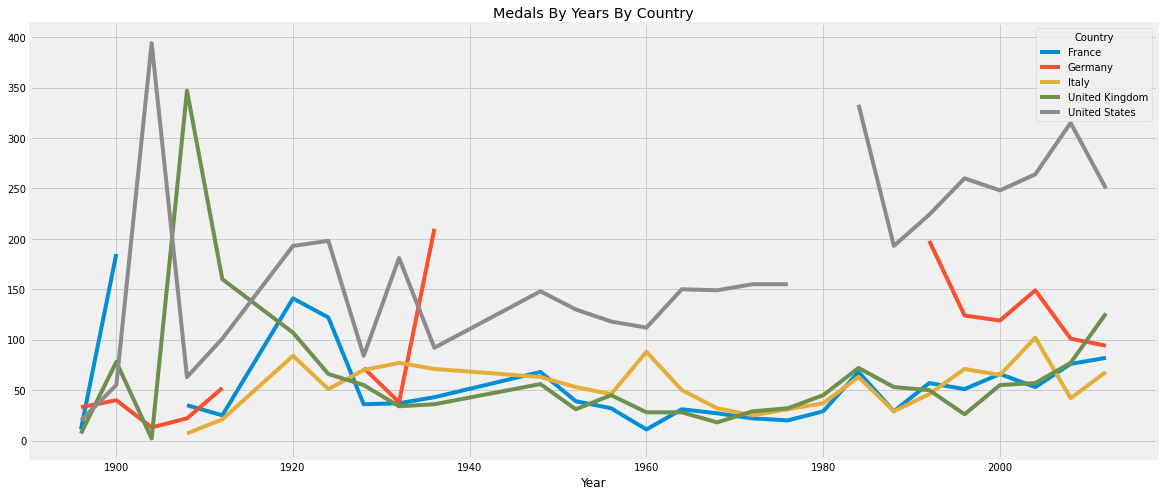

In [40]:
test1=summer.groupby(['Country','Year'])['Medal'].count().reset_index()
test1=test1[test1['Country'].isin(summer['Country'].value_counts()[:5].index)]
test1=test1.pivot('Year','Country','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()

#### Discontinuities in the graph exist due to:



1.   Germany had been selected to host the 1916 Summer Olympics as well as the 
1940 Winter Olympics, both of which had to be cancelled due to World Wars. After these wars, Germans were banned from participating in 1920, 1924 and 1948.
2.   While the country was divided, each of the two German states boycotted one of the Summer Games: in 1980 West Germany was one of 66 nations which did not go to Moscow in protest at the Soviet invasion of Afghanistan and in 1984 East Germany joined the Soviet Union (and several others) in the boycott of the Summer Games in Los Angeles.
3.   
In 1980, the United States led a boycott of the Summer Olympic Games in Moscow to protest the late 1979 Soviet invasion of Afghanistan. In total, 65 nations refused to participate in the games, whereas 80 countries sent athletes to compete.



# Winter Olympics

In [80]:
print('The Most Decorated Male Athlete is',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],'medals')
print('The Most Decorated Female Athlete is',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],'medals')

The Most Decorated Male Athlete is Ole Einar Bjoerndalen with 13 medals
The Most Decorated Female Athlete is Stefania Belmondo with 10 medals


### The Most Decorated Male Athlete is Ole Einar Bjoerndalen with 13 medals
![](https://7wallpapers.net/wp-content/uploads/Ole-Einar-Bjoerndalen-5-1800x1200.jpg)

### The Most Decorated Female Athlete is Stefania Belmondo with 10 medals
![](https://media.gettyimages.com/photos/stefania-belmondo-of-italy-wins-the-womens-15-kilometer-free-mass-picture-id691683306?s=2048x2048)

### Athletes with the Most Medal Type

In [42]:
winter=winter.merge(countries,left_on='Country',right_on='Code',how='left')
winter=winter[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
winter.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']
medals=winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
569,Björn Daehlie,Gold,8
1655,Harri Kirvesniemi,Bronze,6
3568,Raisa Smetanina,Silver,5


In [72]:
medals_map = winter.groupby(['Country','Code'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)
medals_map.head()

,Country,Code,Medal
35,United States,USA,653
5,Canada,CAN,625
25,Norway,NOR,457
11,Finland,FIN,434
31,Sweden,SWE,433


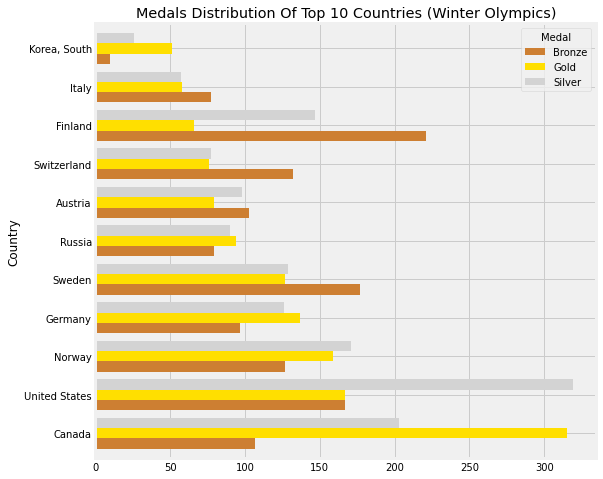

In [44]:
medals_country=winter.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medals Distribution Of Top 10 Countries (Winter Olympics)')
plt.show()

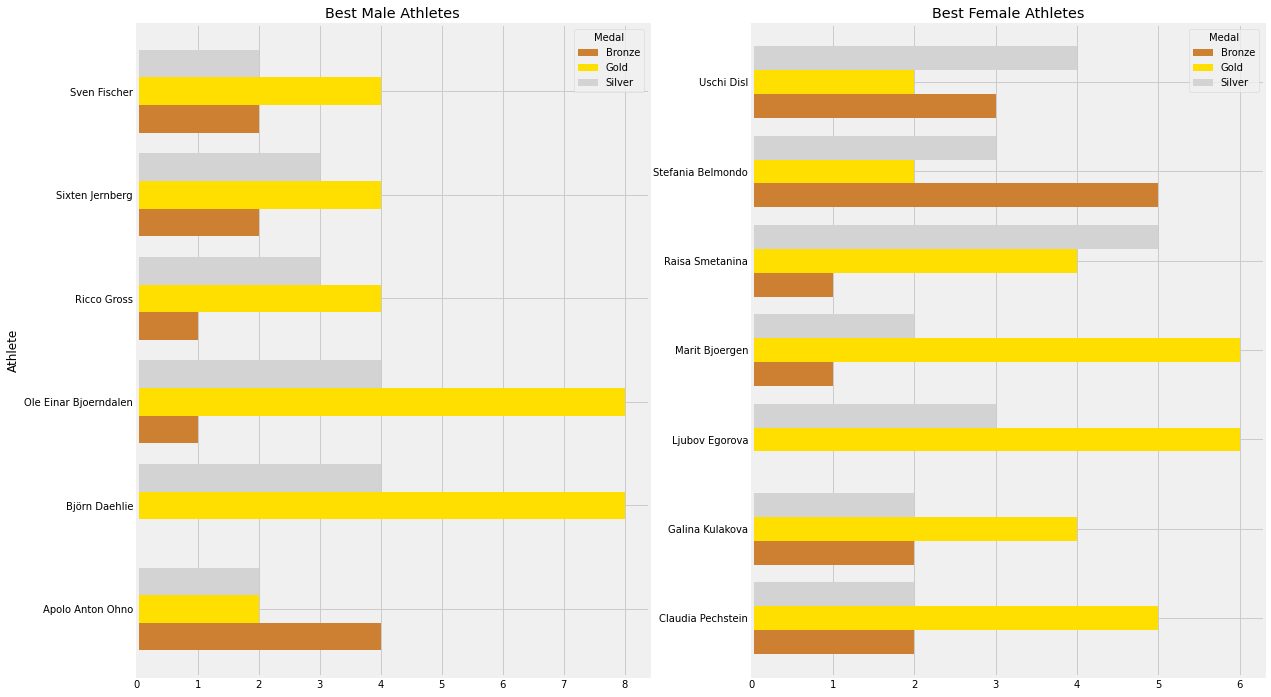

In [45]:
fig,ax=plt.subplots(1,2,figsize=(18,12))
men=winter[winter['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(winter['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=winter[winter['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(winter['Athlete'].value_counts().index[:10])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

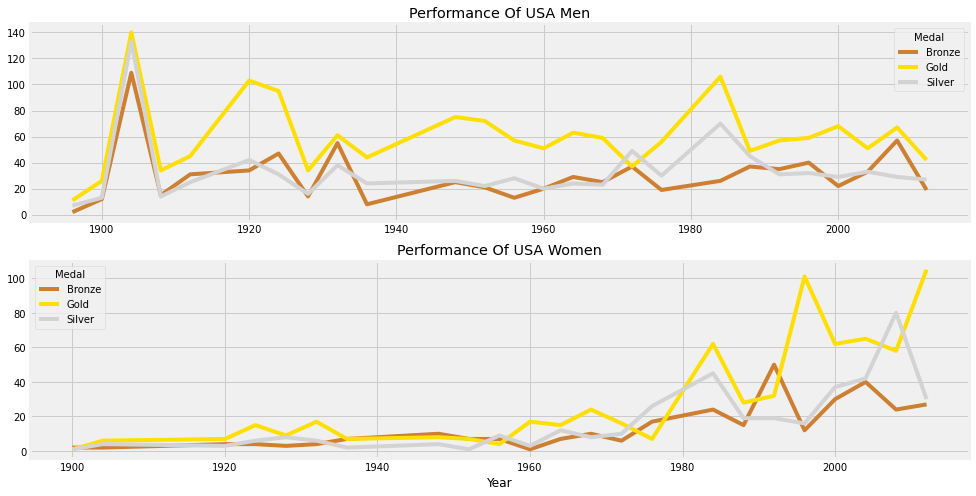

In [70]:
USA_medal_male=summer[(summer['Country']=='United States')&(summer['Gender']=='Men')]
USA_medal_female=summer[(summer['Country']=='United States')&(summer['Gender']=='Women')]
fig,ax=plt.subplots(2,figsize=(15,8))
male=USA_medal_male.groupby(['Medal','Year'])['Event'].count().reset_index()
male=male.pivot('Year','Medal','Event')
male.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title('Performance Of USA Men')
female=USA_medal_female.groupby(['Medal','Year'])['Event'].count().reset_index()
female=female.pivot('Year','Medal','Event')
female.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Performance Of USA Women')
plt.show()